
# Project: Investigate a Dataset (No-Show Appointment)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Dataset used for this project was collected from Kaggle the dataset contains 110k medical appointments in Brazil, collected in May/June 2016 and its focused on characteristics of patients as well as their presence or absence from scheduled medical.
The dataset is made up of 14 unique variables..

# Column:         Description

In [2]:
#Load libraries
#Data processing and Data Manipulation
import pandas as pd
#Calculation & array usage
import numpy as np
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Load Data

In [3]:
#for loading data
df = pd.read_csv("no appointment.csv")

In [4]:
# show first five rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#for cheking details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#for checking nul values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
#for checking duplicate values 
df.duplicated().sum()

0

In [8]:
#for checking unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
#for checking the totall count in gender column
df.Gender.value_counts() 

F    71840
M    38687
Name: Gender, dtype: int64

In [10]:
#for checking the statical summary of data frame 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning & Preprocessing

In [12]:
#for check the data type of columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [13]:
# connverting ScheduledDay & AppointmentDay into correct format
df["ScheduledDay"]=df['ScheduledDay'].apply(pd.to_datetime)
df["AppointmentDay"]=df["AppointmentDay"].apply(pd.to_datetime)

In [14]:
# make a new coulmn named waiting_time
df['waiting_time']=(df['AppointmentDay']-df['ScheduledDay']).dt.days+1 #the + 1 is added to account for the day of the appointment itself. 

In [15]:
#cheking null values of column waiting time
df['waiting_time'].isnull().sum()

0

In [16]:
#filling null values with 0
df['waiting_time'] = df['waiting_time'].fillna(0)

In [17]:
#statical summary of waiting column
df['waiting_time'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_time, dtype: float64

In [18]:
#checking values of waiting column under 0 
df[df['waiting_time']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_time
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [19]:
#replacing values under 0 with 0
df['waiting_time'] = df['waiting_time'].apply(lambda x: 0 if x < 0 else x)

In [20]:
#statical summary of waiting column
df['waiting_time'].describe()

count    110527.000000
mean         10.183792
std          15.254924
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_time, dtype: float64

In [21]:
#df['No-show'] = df['No-show'].replace({'Yes':1,'No':0})

In [22]:
#df['Gender'] = df['Gender'].replace({'M':1,'F':0})

In [23]:
#shows the outliers have age less than 0 and greater than 100 
df[(df['Age'] < 0) | (df['Age'] > 100)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_time
58014,9.762948e+14,5651757,F,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,0,0,0,0,0,0,No,0
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,3
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,3
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,38
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,No,0
90372,2.342836e+11,5751563,F,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,0,0,0,0,0,0,No,2
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,No,15
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No,0


In [24]:
#removing outliers of age column
ind=df[df.Age<0].index
ind1=df[df.Age>100].index
df.drop(ind, inplace=True)
df.drop(ind1, inplace=True)

In [25]:
#statical summary of age column
df.Age.describe()

count    110519.000000
mean         37.084519
std          23.103165
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         100.000000
Name: Age, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis


# What is the ratio of patient attendance ?

In [26]:
#show the totall count of no-column
df['No-show'].value_counts() 

No     88203
Yes    22316
Name: No-show, dtype: int64

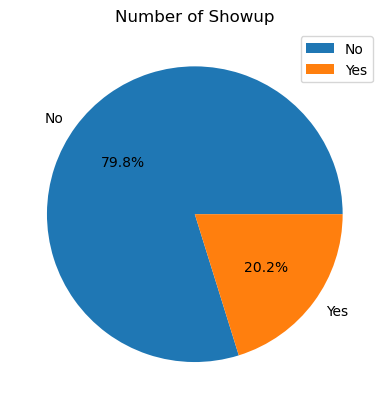

In [27]:
plt.pie(df['No-show'].value_counts(),labels = ["No","Yes"],autopct ="%.01f%%")
plt.legend(["No","Yes"])
plt.title('Number of Showup')
plt.show()

## Observation: 

# Is waiting time effect attendance of patients ?

In [28]:
#show unique values of waiting_time column
df['waiting_time'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  80,
        86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,  90,
       151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122, 101,
       105,  92,  97,  93, 107,  95, 139, 132, 179, 117, 146, 123],
      dtype=int64)

In [29]:
#shows statical summary of waiting_time column
df['waiting_time'].describe()

count    110519.000000
mean         10.183977
std          15.255097
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_time, dtype: float64

In [30]:
#create groups based on the waiting time column
bins = [0, 30, 60, 90, 120, 150, 180]
df['waiting_time'] = pd.cut(df['waiting_time'], bins=bins)

In [31]:
df['waiting_time'] 

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
              ...     
110522    (30.0, 60.0]
110523    (30.0, 60.0]
110524    (30.0, 60.0]
110525    (30.0, 60.0]
110526    (30.0, 60.0]
Name: waiting_time, Length: 110519, dtype: category
Categories (6, interval[int64, right]): [(0, 30] < (30, 60] < (60, 90] < (90, 120] < (120, 150] < (150, 180]]

In [32]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_time
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,NaN
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,NaN
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,NaN
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,NaN
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,"(30.0, 60.0]"
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,"(30.0, 60.0]"
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,"(30.0, 60.0]"
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,"(30.0, 60.0]"


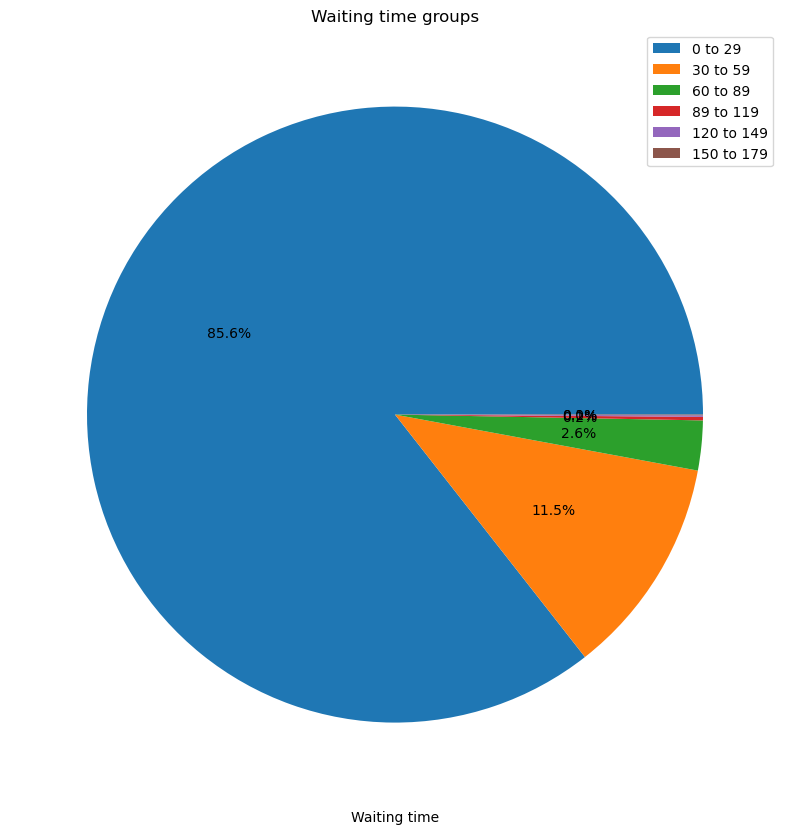

In [33]:
plt.figure(figsize=(10,10))
plt.pie(df['waiting_time'].value_counts(),autopct ="%.01f%%")
plt.title('Waiting time groups')
plt.xlabel("Waiting time")
plt.legend(["0 to 29","30 to 59","60 to 89","89 to 119","120 to 149","150 to 179"])
plt.show()

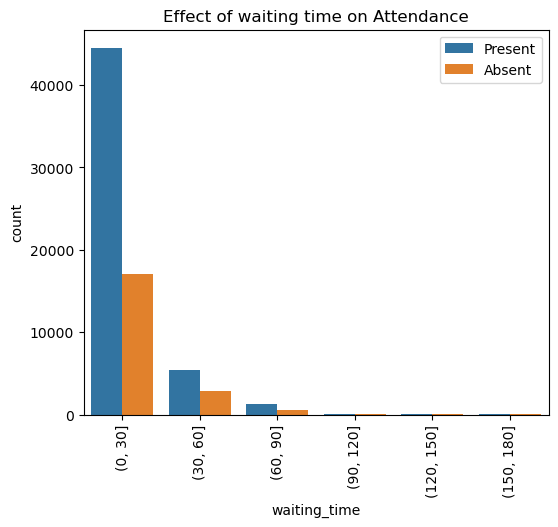

In [34]:
plt.figure(figsize=(6,5))
plt.xticks(rotation = 90)
sns.countplot(x=df['waiting_time'],hue=df['No-show'])
plt.title('Effect of waiting time on Attendance')
plt.legend(['Present','Absent'])
plt.show()

#  Observation: 

# Is Age effect attendance of patients?

(array([17475., 12936., 13699., 15171., 14209., 15863., 11876.,  5934.,
         2946.,   410.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

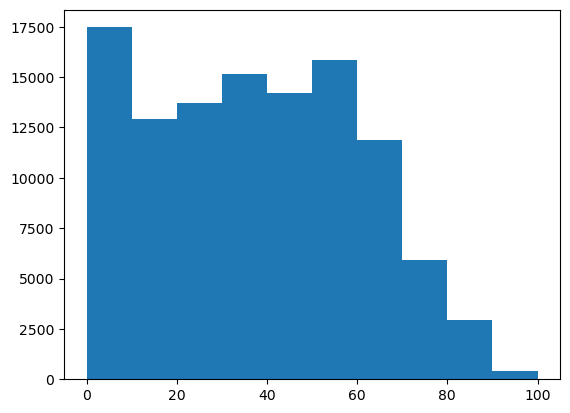

In [35]:
plt.hist(df['Age'])

In [36]:
#shown unique values of age column
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 100,  99], dtype=int64)

In [37]:
#create age groups
bin_edges = [0, 20, 40, 60, 80, 100]
df['Age Group'] = pd.cut(df['Age'], bins=bin_edges)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110519 non-null  float64            
 1   AppointmentID   110519 non-null  int64              
 2   Gender          110519 non-null  object             
 3   ScheduledDay    110519 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110519 non-null  datetime64[ns, UTC]
 5   Age             110519 non-null  int64              
 6   Neighbourhood   110519 non-null  object             
 7   Scholarship     110519 non-null  int64              
 8   Hipertension    110519 non-null  int64              
 9   Diabetes        110519 non-null  int64              
 10  Alcoholism      110519 non-null  int64              
 11  Handcap         110519 non-null  int64              
 12  SMS_received    110519 non-null  int64              
 13  No-show       

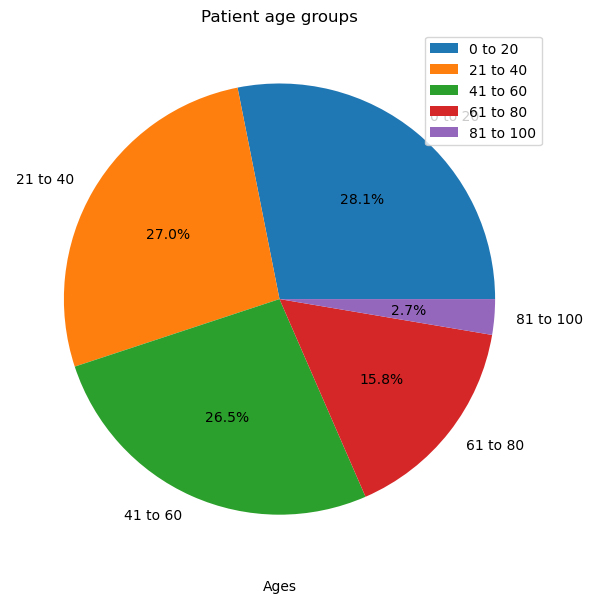

In [39]:
plt.figure(figsize=(7,7))
plt.pie(df['Age Group'].value_counts(),labels = ["0 to 20","21 to 40","41 to 60","61 to 80","81 to 100"],autopct ="%.01f%%")
plt.title('Patient age groups')
plt.xlabel("Ages")
plt.legend(["0 to 20","21 to 40","41 to 60","61 to 80","81 to 100"])
plt.show()

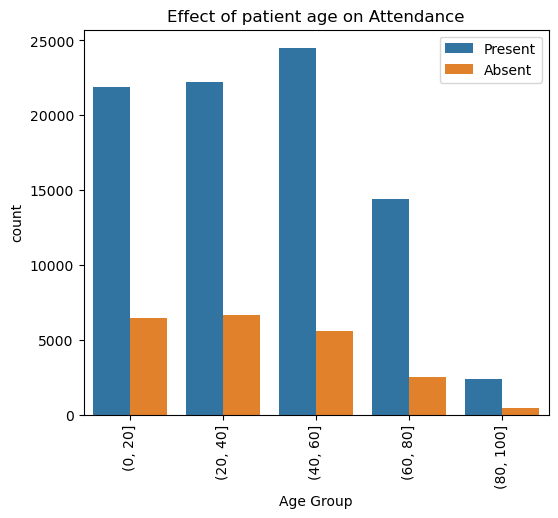

In [40]:
plt.figure(figsize=(6,5))
plt.xticks(rotation = 90)
sns.countplot(x=df['Age Group'],hue=df['No-show'])
plt.title('Effect of patient age on Attendance')
plt.legend(['Present','Absent'])
plt.show()

# Observation:

# Is gender effect attendance of patients?

In [41]:
#shows the totall count of gender column
df['Gender'].value_counts()

F    71832
M    38687
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Patient gender')

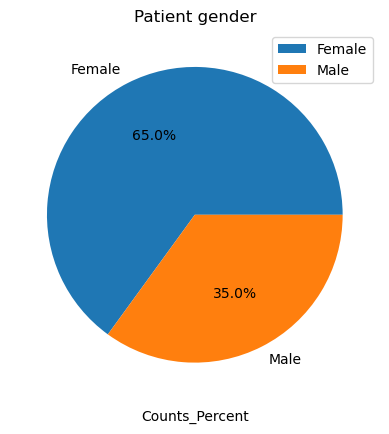

In [42]:
plt.pie(df['Gender'].value_counts(),labels = ['Female','Male'],autopct ="%.01f%%")
plt.xlabel('Counts_Percent')
plt.legend(['Female','Male'])
plt.title('Patient gender')

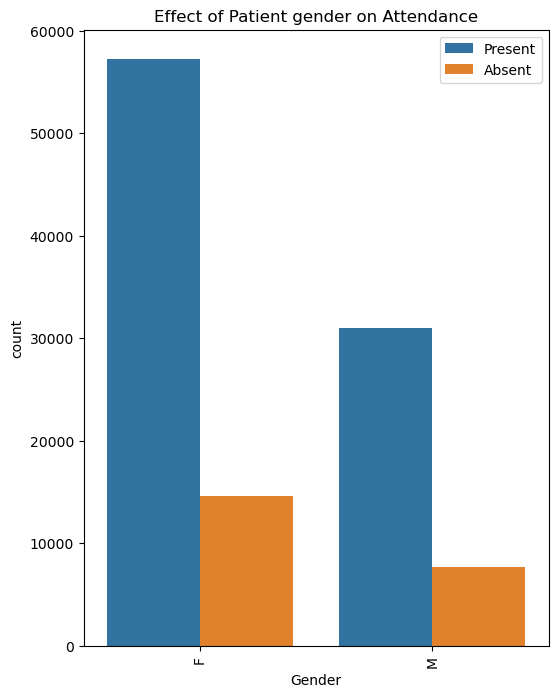

In [43]:
plt.figure(figsize=(6,8))
plt.xticks(rotation = 90)
sns.countplot(x=df['Gender'],hue=df['No-show'])
plt.title('Effect of Patient gender on Attendance')
plt.legend(['Present','Absent'])
plt.show()

# Observation:

# Is scholership effect attendance of patients?

In [44]:
#shows the totall count of scholership column
df['Scholarship'].value_counts()

0    99658
1    10861
Name: Scholarship, dtype: int64

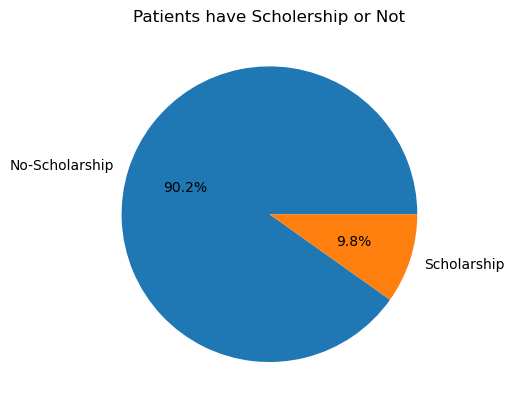

In [45]:
plt.pie(df['Scholarship'].value_counts(),labels = ['No-Scholarship','Scholarship'],autopct ="%.01f%%")
plt.title("Patients have Scholership or Not")
plt.show()

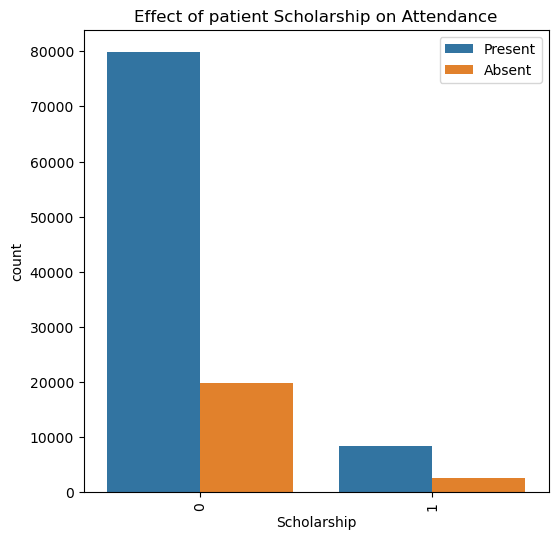

In [46]:
plt.figure(figsize=(6,6))
plt.xticks(rotation = 90)
sns.countplot(x=df['Scholarship'],hue=df['No-show'])
plt.title("Effect of patient Scholarship on Attendance")
plt.legend(['Present','Absent'])

# Observation:

# Effect of sms on patients attandance?

In [47]:
#show the totall count of sms_receiving column
df['SMS_received'].value_counts()

0    75038
1    35481
Name: SMS_received, dtype: int64

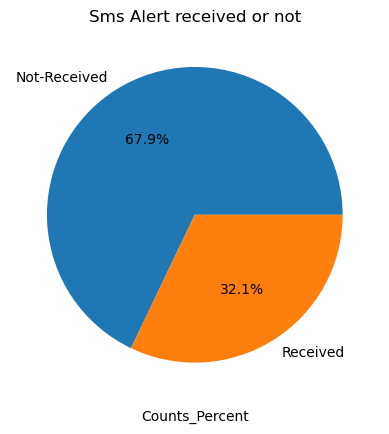

In [48]:
plt.pie(df['SMS_received'].value_counts(),labels = ['Not-Received','Received'],autopct ="%.01f%%")
plt.xlabel('Counts_Percent')
plt.title("Sms Alert received or not")
plt.show()

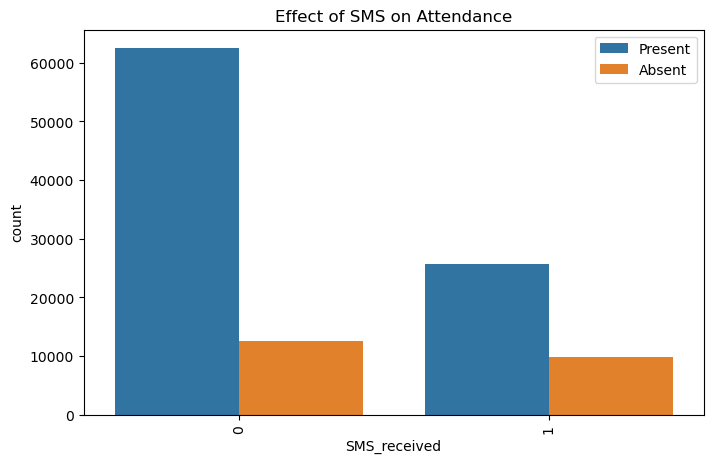

In [49]:
plt.figure(figsize=(8,5))
plt.xticks(rotation = 90)
sns.countplot(x=df['SMS_received'],hue=df['No-show'])
plt.title('Effect of SMS on Attendance')
plt.legend(['Present','Absent'])
plt.show()

# Observation:

<a id='conclusions'></a>
## Conclusions

>20% of the total population doesn't show up for appointments.

> A waiting time of 60 days or above increases the absence ratio.

>Patients aged between 40 to 60 have less absence as compared to others.

>Females have more attendance as compared to males because they are sensitive and more health conscious.

>Scholarships have no impact on attendance.

>SMS has no impact on attendance.